# Section B: Basketball game record

| NAME                | MATRIC NO |
|---------------------|-----------|
| ZHENG AO            | 208738    |
| SHUAI ZIYUAN        | 208708    |
| ZHAO YUANHAO        | 208744    |
| HAN ZHENXINGLONG    | 208745    |
| DOU ZHANGSHUO       | 208944    |


In [1]:
import os
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report

### Sample questions:   

1. predicting whether the team will win or lose when certain combination of players is formed in a game
2. predict the points, ratings, turnover, etc
3. association rules on the winning or lose
4. clustering players based on their strengths and weaknesses

### Read the data

In [2]:
curr_path = os.getcwd()
file_path = curr_path + '/data.xlsx'

In [3]:
df = pd.read_excel(file_path)
df.head()

,NO,NO of player,PLAYER,PTS,REB,AST,STL,BLK,T/O,RTG,...,FT-MISS,FT-ATT,FT %,REB\n(Off),REB\n(Def),Fouls\n(Tot),MIN,W/L,OPPONENT,Game_Type
0,1,11,Kisyok,4,10,1.0,0.0,1.0,1.0,26.0,...,0.0,0.0,0.0,3.0,7.0,0.0,NaN,1,JOKERS,FRIENDLY (NCBL PREP)
1,1,2,Afiq,4,7,4.0,0.0,1.0,1.0,23.0,...,0.0,0.0,0.0,3.0,4.0,1.0,NaN,1,JOKERS,FRIENDLY (NCBL PREP)
2,1,13,Po,6,7,2.0,0.0,0.0,3.0,19.0,...,0.0,0.0,0.0,5.0,2.0,1.0,NaN,1,JOKERS,FRIENDLY (NCBL PREP)
3,1,14,Salim,6,7,0.0,0.0,1.0,3.0,19.0,...,0.0,0.0,0.0,2.0,5.0,0.0,NaN,1,JOKERS,FRIENDLY (NCBL PREP)
4,1,5,Azim,10,3,1.0,3.0,0.0,2.0,18.0,...,0.0,0.0,0.0,0.0,3.0,1.0,NaN,1,JOKERS,FRIENDLY (NCBL PREP)


In [69]:
df.columns

Index(['NO', 'NO of player', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'T/O', 'RTG',
       'FG (TOT)-MADE', 'FG (TOT)-MISS', 'FG (TOT)-ATT', 'FG %',
       'FG (2-PT)-MADE', 'FG (2-PT)-MISS', 'FG (2-PT)-ATT', '2-PT %',
       'FG (3-PT)-MADE', 'FG (3-PT)-MISS', 'FG (3-PT)-ATT', '3-PT %',
       'FT-MADE', 'FT-MISS', 'FT-ATT', 'FT %', 'REB\n(Off)', 'REB\n(Def)',
       'Fouls\n(Tot)', 'W/L', 'OPPONENT', 'Game_Type', 'cluster'],
      dtype='object')

### Data Cleaning

In [4]:
df.describe()

,NO,NO of player,PTS,REB,AST,STL,BLK,T/O,RTG,FG (TOT)-MADE,...,3-PT %,FT-MADE,FT-MISS,FT-ATT,FT %,REB\n(Off),REB\n(Def),Fouls\n(Tot),MIN,W/L
count,255.000000,255.00000,255.000000,255.000000,186.000000,186.000000,186.000000,186.000000,245.000000,255.000000,...,255.000000,194.000000,193.000000,251.000000,255.000000,89.000000,186.000000,39.000000,0.0,255.000000
mean,9.000000,8.00000,3.509804,2.674510,1.037634,1.150538,0.338710,1.602151,10.179592,1.454902,...,7.124706,0.417526,0.528497,0.729084,9.829804,1.044944,3.166667,1.025641,NaN,0.588235
std,4.908614,4.32899,4.547962,3.212907,1.320804,1.458961,0.680466,1.709369,10.471291,1.943322,...,18.794168,0.925125,1.080348,1.611928,23.801505,1.429480,2.922266,1.347262,NaN,0.493121
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,5.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,9.000000,8.00000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,8.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,NaN,1.000000
75%,13.000000,12.00000,5.000000,5.000000,2.000000,2.000000,0.000000,2.000000,18.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,5.000000,2.000000,NaN,1.000000
max,17.000000,15.00000,20.000000,15.000000,6.000000,9.000000,3.000000,8.000000,42.000000,10.000000,...,100.000000,6.000000,6.000000,10.000000,100.000000,5.000000,15.000000,5.000000,NaN,1.000000


In [5]:
df = df.fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO              255 non-null    int64  
 1   NO of player    255 non-null    int64  
 2   PLAYER          255 non-null    object 
 3   PTS             255 non-null    int64  
 4   REB             255 non-null    int64  
 5   AST             255 non-null    float64
 6   STL             255 non-null    float64
 7   BLK             255 non-null    float64
 8   T/O             255 non-null    float64
 9   RTG             255 non-null    float64
 10  FG (TOT)-MADE   255 non-null    int64  
 11  FG (TOT)-MISS   255 non-null    int64  
 12  FG (TOT)-ATT    255 non-null    int64  
 13  FG %            255 non-null    float64
 14  FG (2-PT)-MADE  255 non-null    float64
 15  FG (2-PT)-MISS  255 non-null    float64
 16  FG (2-PT)-ATT   255 non-null    int64  
 17  2-PT %          255 non-null    flo

In [7]:
df['OPPONENT'].unique()

array(['JOKERS', 'BBST', 'SLASHERS', 'Hurricanes(Div 2)',
       'Purge (D3 Game 1)', 'Savages (D3 Game2)',
       'GoStrong Jr (D3 Game3)', 'Renaissance (D3 Game 4)',
       'NGAP Nemesis (D3 Game 4)', 'Arcana (D3 Grouping)',
       'ZERO (D3 grouping)', 'Falcons (D3 Grouping)',
       'Titans Zeus (D3 grouping)',
       'Bayang Gelap Wizards (D3 Playoff - Top16)',
       'Titans Poseidon (D3 QF)', 'Arcana(D3 SF)',
       'San Quakes (D3 FINAL)'], dtype=object)

Map game_type

In [8]:
df['Game_Type'].unique()

array(['FRIENDLY (NCBL PREP)', 'NCBL 2018/2019'], dtype=object)

In [9]:
game_type_mapping = {'FRIENDLY (NCBL PREP)': 2, 'NCBL 2018/2019': 1}

In [10]:
df['Game_Type'] = df['Game_Type'].map(game_type_mapping)
df['Game_Type']

0      2
1      2
2      2
3      2
4      2
      ..
250    1
251    1
252    1
253    1
254    1
Name: Game_Type, Length: 255, dtype: int64

Map opponent

In [11]:
df['OPPONENT'].unique()

array(['JOKERS', 'BBST', 'SLASHERS', 'Hurricanes(Div 2)',
       'Purge (D3 Game 1)', 'Savages (D3 Game2)',
       'GoStrong Jr (D3 Game3)', 'Renaissance (D3 Game 4)',
       'NGAP Nemesis (D3 Game 4)', 'Arcana (D3 Grouping)',
       'ZERO (D3 grouping)', 'Falcons (D3 Grouping)',
       'Titans Zeus (D3 grouping)',
       'Bayang Gelap Wizards (D3 Playoff - Top16)',
       'Titans Poseidon (D3 QF)', 'Arcana(D3 SF)',
       'San Quakes (D3 FINAL)'], dtype=object)

In [12]:
opponent_mapping = {
    'JOKERS': 1,
    'BBST': 2,
    'SLASHERS': 3,
    'Hurricanes(Div 2)': 4,
    'Purge (D3 Game 1)': 5,
    'Savages (D3 Game2)': 6,
    'GoStrong Jr (D3 Game3)': 7,
    'Renaissance (D3 Game 4)': 8,
    'NGAP Nemesis (D3 Game 4)': 9,
    'Arcana (D3 Grouping)': 10,
    'ZERO (D3 grouping)': 11,
    'Falcons (D3 Grouping)': 12,
    'Titans Zeus (D3 grouping)': 13,
    'Bayang Gelap Wizards (D3 Playoff - Top16)': 14,
    'Titans Poseidon (D3 QF)': 15,
    'Arcana(D3 SF)': 16,
    'San Quakes (D3 FINAL)': 17
}

In [13]:
df['OPPONENT'] = df['OPPONENT'].map(opponent_mapping)
df['OPPONENT']

0       1
1       1
2       1
3       1
4       1
       ..
250    17
251    17
252    17
253    17
254    17
Name: OPPONENT, Length: 255, dtype: int64

Drop the names of players and MIN

In [14]:
df = df.drop(['PLAYER'], axis=1)

In [15]:
df = df.drop(['MIN'], axis=1)

In [16]:
df.head()

,NO,NO of player,PTS,REB,AST,STL,BLK,T/O,RTG,FG (TOT)-MADE,...,FT-MADE,FT-MISS,FT-ATT,FT %,REB\n(Off),REB\n(Def),Fouls\n(Tot),W/L,OPPONENT,Game_Type
0,1,11,4,10,1.0,0.0,1.0,1.0,26.0,2,...,0.0,0.0,0.0,0.0,3.0,7.0,0.0,1,1,2
1,1,2,4,7,4.0,0.0,1.0,1.0,23.0,2,...,0.0,0.0,0.0,0.0,3.0,4.0,1.0,1,1,2
2,1,13,6,7,2.0,0.0,0.0,3.0,19.0,3,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1,1,2
3,1,14,6,7,0.0,0.0,1.0,3.0,19.0,3,...,0.0,0.0,0.0,0.0,2.0,5.0,0.0,1,1,2
4,1,5,10,3,1.0,3.0,0.0,2.0,18.0,5,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1,1,2


Correlation Analysis

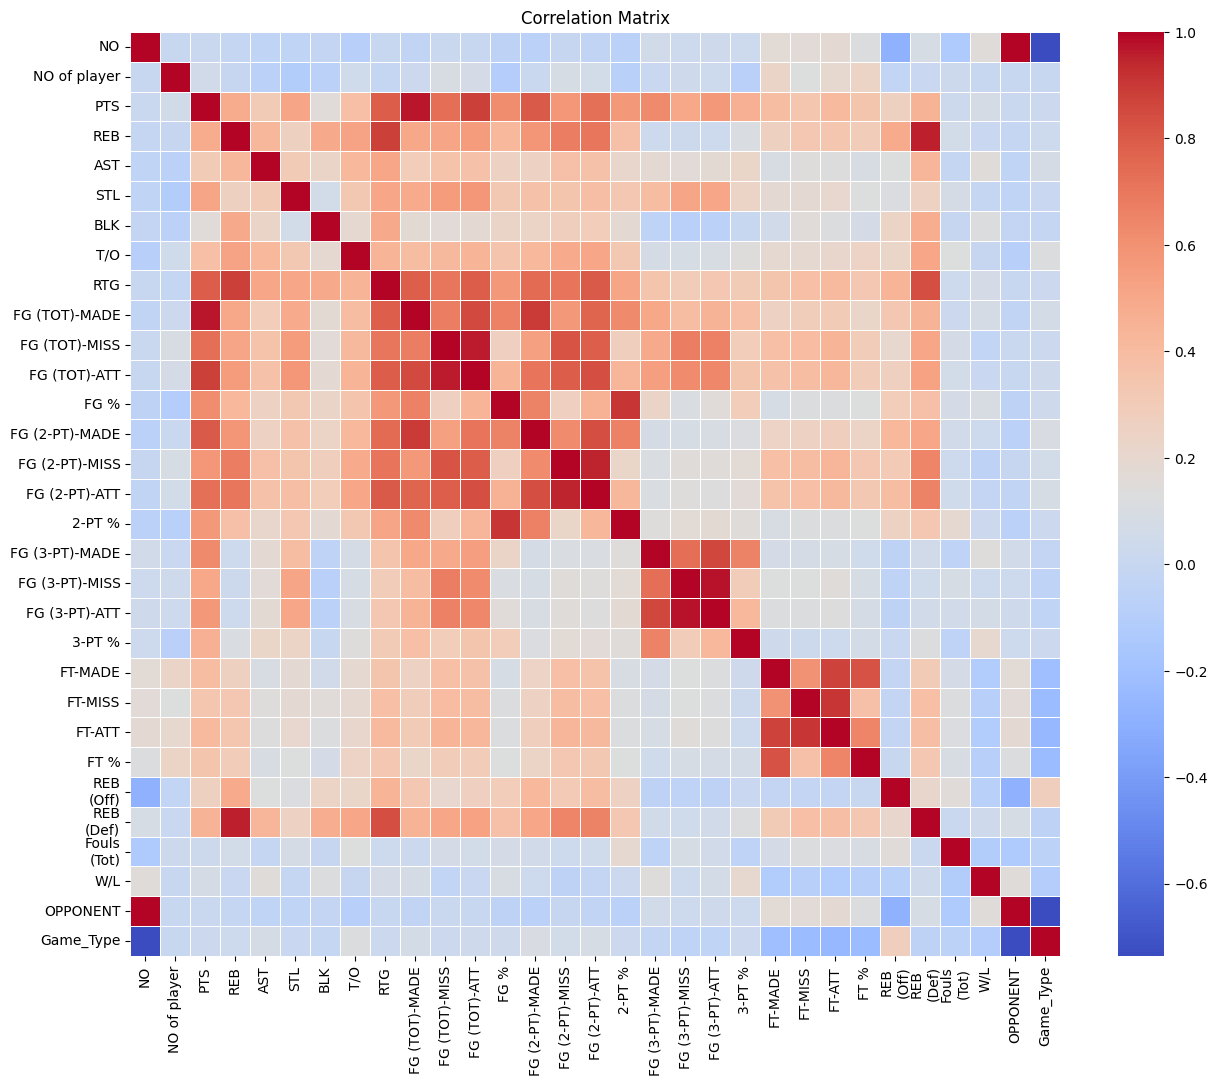

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

- **Color interpretation**:
  - **Dark red**: indicates a positive correlation between two variables, i.e., when one of the variables increases, the other tends to increase.
  - **Dark blue**: indicates that there is a negative correlation between the two variables, that is, when one of the variables increases, the other tends to decrease.
  - **Light color (blue or red)**: indicates a weak correlation.
  - **White**: indicates little to no correlation.

- **Variable Explanation**:
  - **NO of player**: may indicate the number of the player or the number of players in the team.
  - **PTS (Points Scored)**: player or team points scored, usually with a strong positive correlation with other offensive stats (e.g., shooting percentage).
  - **REB (Rebounds)**, **AST (Assists)**, **STL (Steals)**, **BLK (Blocks)**, etc. are all statistics used in basketball.
  - **TO (Turnovers)**: The number of turnovers, which may be negatively correlated with scoring or other offensive statistics.
  - **RTG (Rating)**: The rating of a player or team.
  - **FG (Field Goals)**, **FT (Free Throws)**, and **3-PT (Three-Point Shots)**: the number of hits, misses, and attempts on shots, free throws, and three-pointers, respectively, as well as their percent success.

- **Relevance Explained**:
  - For example, there may be a strong positive correlation between **FG% (Field Goal Percentage)** and **PTS** because a high percentage of field goals made usually means more points scored.
  - There may be a negative correlation between **TO** and **PTS**, as more turnovers may lead to fewer scoring opportunities.
  - There may be a positive correlation between **AST (Assists)** and **FGM (Field Goals Made)** because more assists usually mean more scoring chances are converted into actual points.

In this graph, it can be observed that certain combinations of variables form a darker colored area, indicating a stronger correlation between them. For example, the number of attempts and successes on field goals, three-pointers, and free throws are usually highly correlated with scoring. This means that a player's or team's ability to score depends heavily on the number and accuracy of their shots. Conversely, the number of turnovers (TO) may be negatively correlated with scoring because turnovers lead to lost offensive opportunities.

### Data Visualization


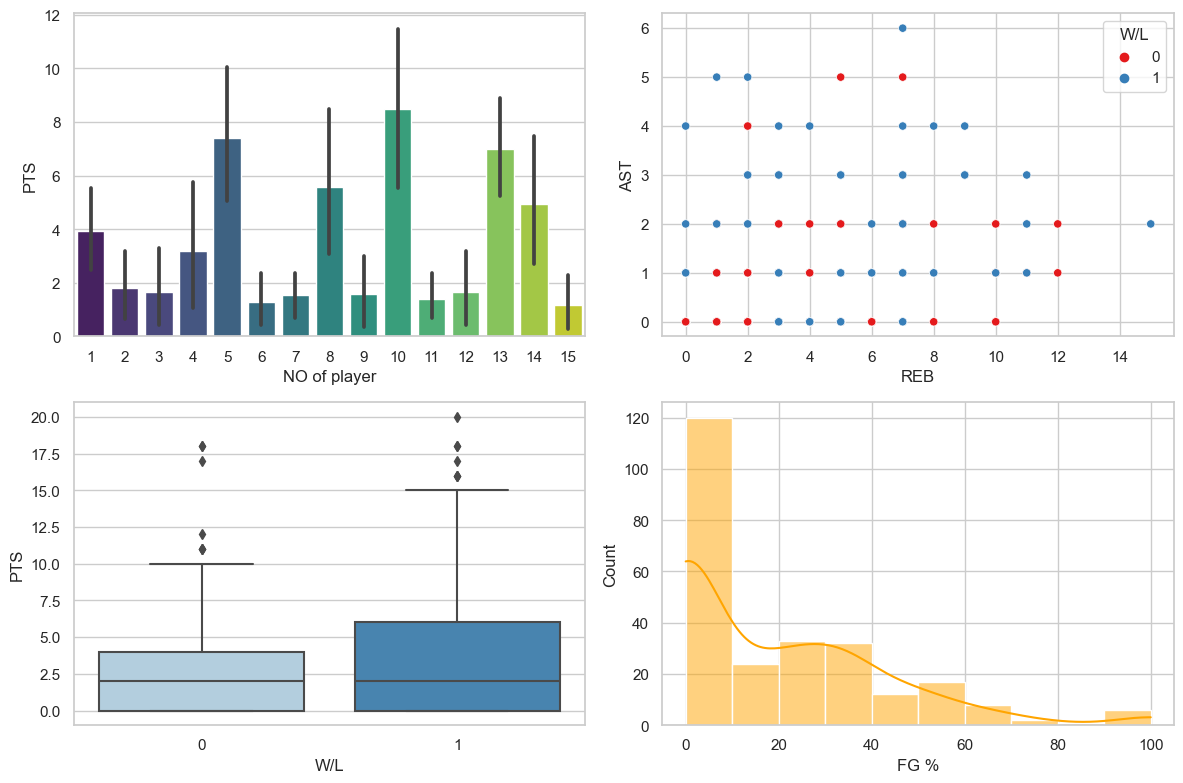

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.barplot(x='NO of player', y='PTS', data=df, ax=axes[0, 0], palette='viridis')
sns.scatterplot(x='REB', y='AST', data=df, hue='W/L', ax=axes[0, 1], palette='Set1')
sns.boxplot(x='W/L', y='PTS', data=df, ax=axes[1, 0], palette='Blues')
sns.histplot(df['FG %'], kde=True, ax=axes[1, 1], color='orange')
plt.tight_layout()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


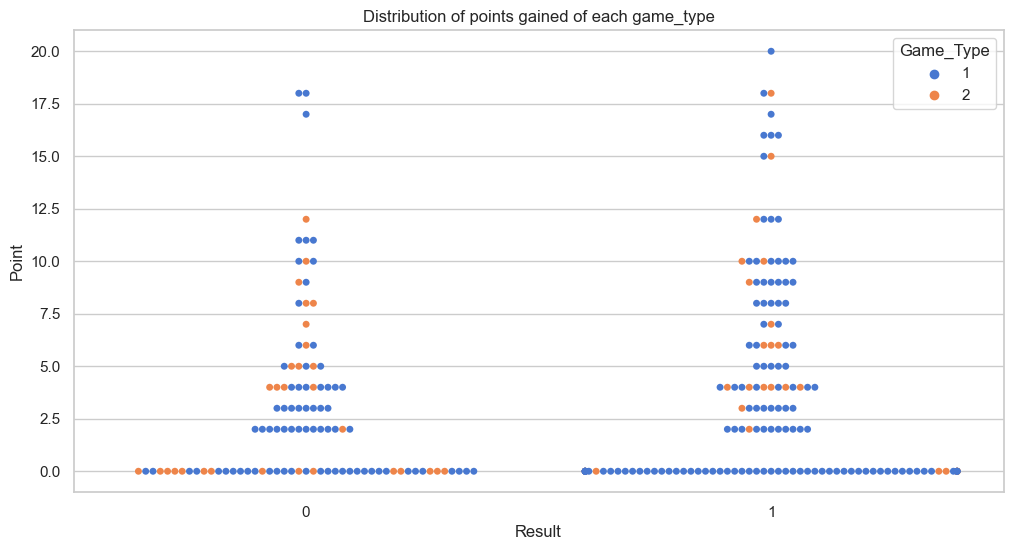

In [75]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='W/L', y='PTS', hue='Game_Type', data=df, palette='muted')
plt.title('Distribution of points gained of each game_type')
plt.xlabel('Result')
plt.ylabel('Point')
plt.show()

Shooting data analysis

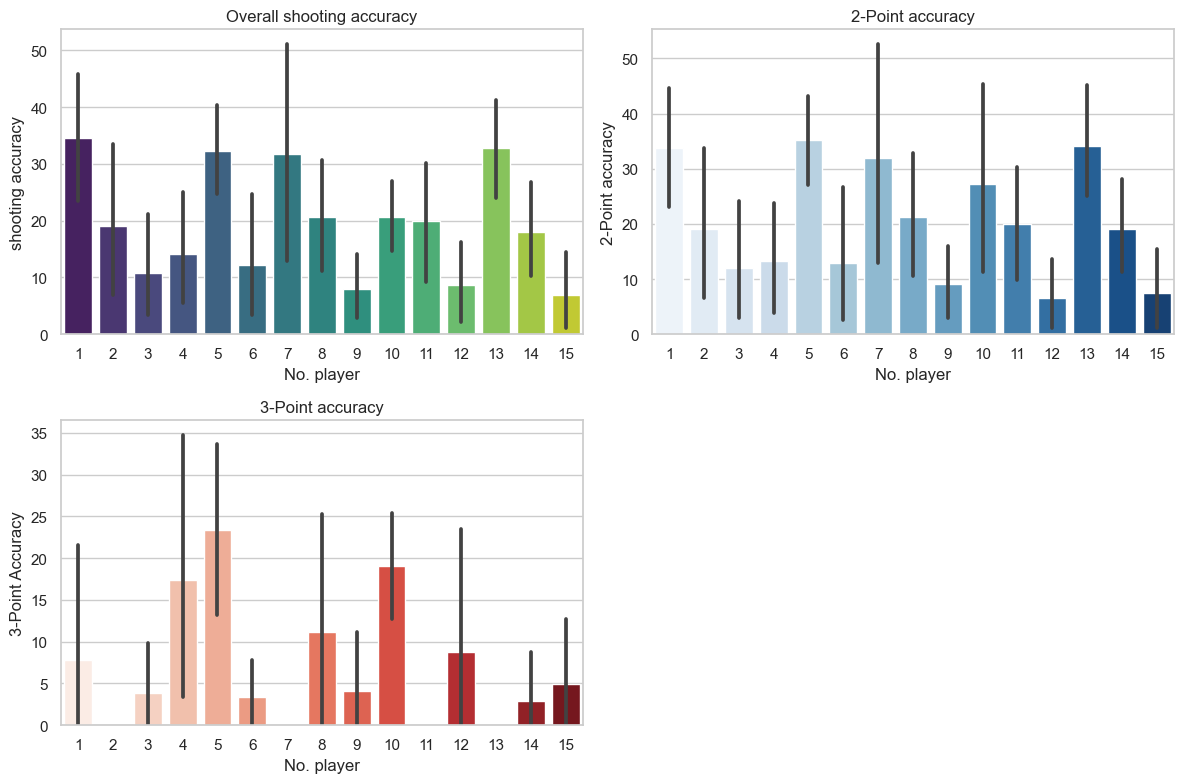

In [81]:
plt.figure(figsize=(12, 8))

# 总体投篮命中率
plt.subplot(2, 2, 1)
sns.barplot(x='NO of player', y='FG %', data=df, palette='viridis')
plt.title('Overall shooting accuracy')
plt.xlabel('No. player')
plt.ylabel('shooting accuracy')

# 两分球和三分球命中率
plt.subplot(2, 2, 2)
sns.barplot(x='NO of player', y='2-PT %', data=df, palette='Blues')
plt.title('2-Point accuracy')
plt.xlabel('No. player')
plt.ylabel('2-Point accuracy')

plt.subplot(2, 2, 3)
sns.barplot(x='NO of player', y='3-PT %', data=df, palette='Reds')
plt.title('3-Point accuracy')
plt.xlabel('No. player')
plt.ylabel('3-Point Accuracy')

plt.tight_layout()
plt.show()

Defense analysis

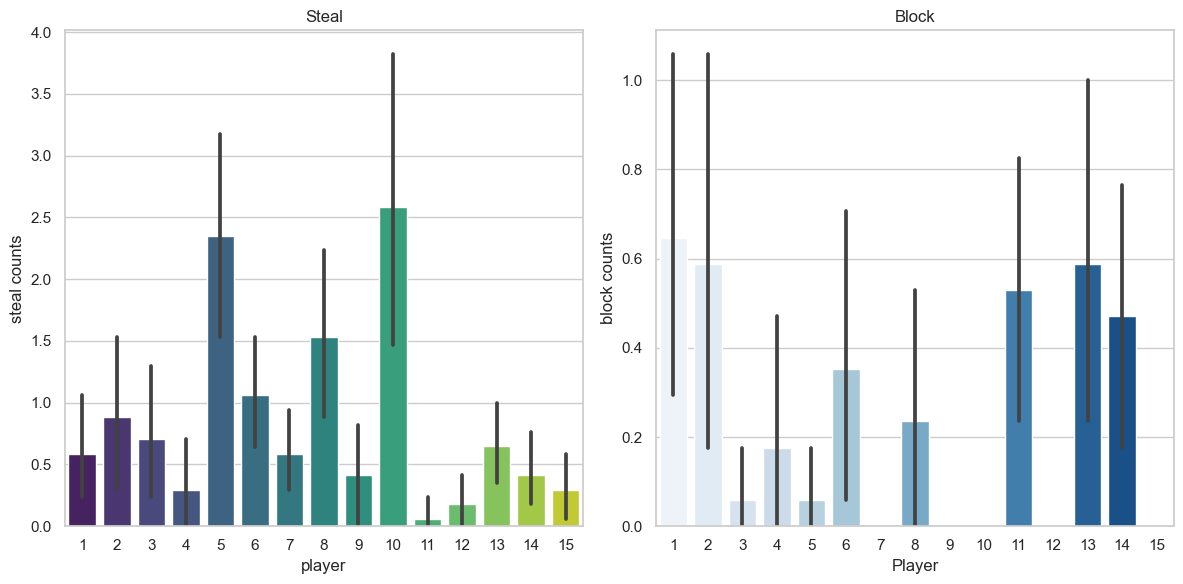

In [84]:
plt.figure(figsize=(12, 6))

# 抢断分析
plt.subplot(1, 2, 1)
sns.barplot(x='NO of player', y='STL', data=df, palette='viridis')
plt.title('Steal')
plt.xlabel('player')
plt.ylabel('steal counts')

# 盖帽分析
plt.subplot(1, 2, 2)
sns.barplot(x='NO of player', y='BLK', data=df, palette='Blues')
plt.title('Block')
plt.xlabel('Player')
plt.ylabel('block counts')

plt.tight_layout()
plt.show()

### Prepare data for model buliding

#### Question B.1. Predict the point of a player

In [18]:
df_points = df 

fill up value using 0

In [19]:
df_points = df_points.fillna(0)

In [20]:
df_points = df_points.drop(['NO','NO of player'], axis=1)

In [85]:
df_points.head()

,PTS,REB,AST,STL,BLK,T/O,RTG,FG (TOT)-MADE,FG (TOT)-MISS,FG (TOT)-ATT,...,FT-MADE,FT-MISS,FT-ATT,FT %,REB\n(Off),REB\n(Def),Fouls\n(Tot),W/L,OPPONENT,Game_Type
0,4,10,1.0,0.0,1.0,1.0,26.0,2,3,5,...,0.0,0.0,0.0,0.0,3.0,7.0,0.0,1,1,2
1,4,7,4.0,0.0,1.0,1.0,23.0,2,6,8,...,0.0,0.0,0.0,0.0,3.0,4.0,1.0,1,1,2
2,6,7,2.0,0.0,0.0,3.0,19.0,3,3,6,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1,1,2
3,6,7,0.0,0.0,1.0,3.0,19.0,3,6,9,...,0.0,0.0,0.0,0.0,2.0,5.0,0.0,1,1,2
4,10,3,1.0,3.0,0.0,2.0,18.0,5,9,14,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1,1,2


In [21]:
X = df_points.iloc[:, 1:]
X.shape

(255, 28)

In [22]:
y = df_points['PTS']
y.shape

(255,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model building

Random forest

In [24]:
# define the algorithm
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# train the model by using our training sets
rf_regressor.fit(X_train, y_train)
# predict the result according to our test features data
rf_predict = rf_regressor.predict(X_test)

In [25]:
# create a new dataFrame to includ all the test features
rf_result = pd.DataFrame()

# add y_test
rf_result['Original Point'] = y_test

# add the prediction
rf_result['Predicted Point'] = rf_predict

# show the result
print(rf_result)

     Original Point  Predicted Point
190               0             0.00
6                 6             5.41
79                5             4.96
205               0             0.00
117               0             0.00
..              ...              ...
141               0             0.00
109               4             4.22
115               2             1.66
245               2             2.03
113               2             2.22

[77 rows x 2 columns]


The importance of each feature

In [26]:
rf_regressor.feature_importances_

array([1.27290717e-03, 6.78743433e-04, 3.41295752e-04, 6.24022356e-04,
       1.11761512e-03, 1.78121444e-03, 8.43406505e-01, 9.86857962e-04,
       6.45840283e-02, 4.46845040e-02, 1.25876496e-03, 9.92638471e-04,
       2.45830457e-03, 3.78835156e-03, 2.37508215e-03, 1.11709657e-03,
       2.13868096e-03, 1.54254899e-03, 7.58868544e-03, 3.40650429e-03,
       5.52654345e-03, 4.73937729e-03, 4.10867530e-04, 5.07327987e-04,
       1.28845078e-04, 3.13051652e-04, 1.60144341e-03, 6.28191900e-04])

Linear Regression

In [27]:
# define the algorithm
linear_regressor = LinearRegression()
# train the model by using our training sets
linear_regressor.fit(X_train, y_train)
# predict the result according to our test features data
lr_predict = linear_regressor.predict(X_test)

In [28]:
# create a new dataFrame and add all the attributes of text features
lr_result = pd.DataFrame()

# add y_test
lr_result['Original'] = y_test

# add the prediction
lr_result['Prediction'] = lr_predict

# show the whole result
print(lr_result)

     Original    Prediction
190         0  1.474664e-15
6           6  6.000000e+00
79          5  5.000000e+00
205         0  1.426092e-15
117         0  1.753819e-15
..        ...           ...
141         0  9.816814e-15
109         4  4.000000e+00
115         2  2.000000e+00
245         2  2.000000e+00
113         2  2.000000e+00

[77 rows x 2 columns]


Feature Coefficients

In [29]:
linear_regressor.coef_

array([-3.87686895e-01, -2.90765172e-01, -2.90765172e-01, -5.81530343e-01,
        2.90765172e-01,  2.90765172e-01,  7.03605981e-01, -5.62884785e-01,
        1.40721196e-01,  2.90264024e-16,  2.42040457e-01,  9.00615655e-02,
        3.32102023e-01, -6.93618921e-16,  7.14863676e-01, -1.46350044e-01,
        5.68513632e-01, -4.40619763e-16,  4.72823219e-01, -2.36411609e-01,
        2.36411609e-01, -1.04083409e-16, -1.93843448e-01, -1.93843448e-01,
       -5.37720909e-15, -3.62936677e-17, -4.85722573e-17,  3.66040206e-16])

> ***Mean Absolute Error，MAE***  
> *MAE is the mean of the absolute errors between the actual observations and the model predictions, smaller values of MAE are preferred*
  
$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$   
   
$n$ means *sample size*   
$y_i$ means *actual value*   
$\hat{y}_i$ means *prection value from model*

In [30]:
# Calculate the MAE value for each model

# apply our test targtes with the prediction from each model
# random forest
rf_mae = mean_absolute_error(y_test, rf_predict)
# linear regression
lr_mae = mean_absolute_error(y_test, lr_predict)


# print out the result, KM as the radius, explained in the previous description
print("MAE of Random Forest: ", rf_mae)
print("MAE of Linear Regression: ", lr_mae)

MAE of Random Forest:  0.5227272727272728
MAE of Linear Regression:  0.005482644005082074


#### Question B.2. Predict Turnover of players

Prepare the data for prediction

In [31]:
df_to = df

In [32]:
df_to = df_to.drop(['NO', 'NO of player'], axis=1)

In [33]:
y = df_to['T/O']
X = df_to.drop(['T/O'], axis=1)

print(X.shape)
print(y.shape)

(255, 28)
(255,)


Split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model building

Random Forest

In [35]:
# define the algorithm
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# train the model by using our training sets
rf_regressor.fit(X_train, y_train)
# predict the result according to our test features data
rf_predict = rf_regressor.predict(X_test)

In [36]:
# create a new dataFrame to includ all the test features
rf_result = pd.DataFrame()

# add y_test
rf_result['Original T/O'] = y_test

# add the prediction
rf_result['Predicted T/O'] = rf_predict

# show the result
print(rf_result)

     Original T/O  Predicted T/O
190           0.0           0.00
6             3.0           1.78
79            2.0           2.27
205           0.0           0.00
117           0.0           0.00
..            ...            ...
141           3.0           0.92
109           5.0           1.64
115           0.0           0.87
245           1.0           1.15
113           1.0           1.81

[77 rows x 2 columns]


Feature Importance

In [37]:
rf_regressor.feature_importances_

array([0.05280923, 0.0701011 , 0.0407516 , 0.07144062, 0.03624468,
       0.05532685, 0.019712  , 0.02155169, 0.07097266, 0.03354743,
       0.03716818, 0.07303208, 0.11299685, 0.03875894, 0.00903764,
       0.00813784, 0.01646037, 0.00854963, 0.00322667, 0.01310728,
       0.00982066, 0.03158291, 0.01365485, 0.081347  , 0.00495251,
       0.00636048, 0.05320954, 0.0061387 ])

Linear Regression

In [38]:
# define the algorithm
linear_regressor = LinearRegression()
# train the model by using our training sets
linear_regressor.fit(X_train, y_train)
# predict the result according to our test features data
lr_predict = linear_regressor.predict(X_test)

In [39]:
# create a new dataFrame and add all the attributes of text features
lr_result = pd.DataFrame()

# add y_test
lr_result['Original T/O'] = y_test

# add the prediction
lr_result['Prediction'] = lr_predict

# show the whole result
print(lr_result)

     Original T/O    Prediction
190           0.0 -1.853292e-14
6             3.0  3.000000e+00
79            2.0  2.000000e+00
205           0.0 -1.858149e-14
117           0.0 -1.929273e-14
..            ...           ...
141           3.0  3.000000e+00
109           5.0  5.000000e+00
115           0.0 -1.643997e-14
245           1.0  1.000000e+00
113           1.0  1.000000e+00

[77 rows x 2 columns]


Feature Coefficients:

In [40]:
linear_regressor.coef_

array([ 8.13884786e-01,  1.33333333e+00,  1.00000000e+00,  1.00000000e+00,
        2.00000000e+00, -1.00000000e+00,  1.84638109e-01, -1.47710487e-01,
        3.69276219e-02,  5.10017813e-16,  6.35155096e-02,  2.36336780e-02,
        8.71491876e-02, -1.58712172e-17,  1.87592319e-01, -3.84047267e-02,
        1.49187592e-01,  8.32667268e-16,  1.24076809e-01, -6.20384047e-02,
        6.20384047e-02,  5.55111512e-17,  6.66666667e-01,  6.66666667e-01,
        2.05131051e-16,  1.00267017e-15, -4.85722573e-17,  1.52395457e-15])

In [41]:
# Calculate the MAE value for each model

# apply our test targtes with the prediction from each model
# random forest
rf_mae = mean_absolute_error(y_test, rf_predict)
# linear regression
lr_mae = mean_absolute_error(y_test, lr_predict)


# print out the result, KM as the radius, explained in the previous description
print("MAE of Random Forest: ", rf_mae)
print("MAE of Linear Regression: ", lr_mae)

MAE of Random Forest:  0.8944155844155844
MAE of Linear Regression:  0.0014387385140945401


#### Question C.1. Predict win or lose for a player

In [42]:
df_win = df

In [43]:
df_win = df_win.drop(['NO', 'NO of player'], axis=1)

In [44]:
y = df_to['W/L']
X = df_to.drop(['W/L'], axis=1)

print(X.shape)
print(y.shape)

(255, 28)
(255,)


Split the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model building

Random Forest

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, rf_pred))

Accuracy: 0.8441558441558441
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.89      0.85      0.87        47

    accuracy                           0.84        77
   macro avg       0.84      0.84      0.84        77
weighted avg       0.85      0.84      0.84        77



Feature Importance

In [48]:
rf_classifier.feature_importances_

array([0.01681134, 0.01870401, 0.01971835, 0.02232983, 0.01852266,
       0.02688898, 0.04400554, 0.01320518, 0.0224065 , 0.03277869,
       0.04342654, 0.0127204 , 0.02777798, 0.0276576 , 0.02289592,
       0.00499619, 0.01066814, 0.01572584, 0.01458382, 0.00928466,
       0.00582711, 0.00663854, 0.00811541, 0.01068377, 0.02183988,
       0.01365559, 0.47772174, 0.0304098 ])

Logistic Regression

In [49]:
lr_classifier = LogisticRegression(random_state=42)

lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)

c:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
lr_pred = lr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, lr_pred))

Accuracy: 0.6623376623376623
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        30
           1       0.71      0.77      0.73        47

    accuracy                           0.66        77
   macro avg       0.64      0.63      0.64        77
weighted avg       0.66      0.66      0.66        77



Feature Coefficients

In [51]:
lr_classifier.coef_[0]

array([-0.03202619, -0.17806866,  0.25613754, -0.29151824,  0.2849427 ,
        0.02421449,  0.12212671, -0.07823621, -0.13955322, -0.21778943,
        0.01358787,  0.35043155, -0.12485066,  0.22558089, -0.02165529,
       -0.24115291,  0.36032714,  0.11917424,  0.03599341, -0.00943057,
       -0.04086288, -0.05029346, -0.01440059, -0.19346356,  0.0153949 ,
       -0.34090625,  0.06816917, -0.27990791])

####   Question A.1. Predicting whether the team will win or lose when certain combination of players is formed in a game

We shall load another dataset now

In [52]:
curr_path = os.getcwd()
file_path = curr_path + '/players_on.xlsx'

In [53]:
df_on = pd.read_excel(file_path)

The unique player number:

In [54]:
df['NO of player'].unique()

array([11,  2, 13, 14,  5,  7, 10,  1,  4,  6,  3,  8,  9, 12, 15],
      dtype=int64)

This dataset keeps track of how players played in each game

In [55]:
df_on.head()

,Game No,player-11,player-2,player-13,player-14,player-5,player-7,player-10,player-1,player-4,player-6,player-3,player-8,player-9,player-12,player-15,WIN/LOSS
0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1
1,2,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1
2,3,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,0
3,4,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
4,5,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1


So we apply classification algorithm to it to predict win or lose.

In [56]:
df_on = df_on.drop(['Game No'], axis=1)

In [57]:
y = df_on['WIN/LOSS']
X = df_on.drop(['WIN/LOSS'], axis=1)

print(X.shape)
print(y.shape)

(17, 15)
(17,)


use Random Forest to select the importance of player

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, rf_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.40      0.57         5

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



Feature Importance

In [61]:
rf_classifier.feature_importances_

array([0.07693348, 0.11694897, 0.06602528, 0.06072523, 0.0231087 ,
       0.16822265, 0.03623867, 0.        , 0.04046351, 0.05690837,
       0.05510812, 0.05516358, 0.07990298, 0.11710191, 0.04714855])

In [62]:
player_importance = pd.DataFrame()
player_importance['Player No'] = X.columns
player_importance['Importance'] = rf_classifier.feature_importances_

In [63]:
player_importance = player_importance.sort_values(by='Importance', ascending=False)
player_importance

,Player No,Importance
5,player-7,0.168223
13,player-12,0.117102
1,player-2,0.116949
12,player-9,0.079903
0,player-11,0.076933
2,player-13,0.066025
3,player-14,0.060725
9,player-6,0.056908
11,player-8,0.055164
10,player-3,0.055108


Hence, with player 7, 12, 2, 9, and 11, is the strongest composition of the team.

#### Question D.1 Clustering players based on their strengths and weaknesses

In [64]:
df_sw = df

In [65]:
df_sw = df_sw.drop(['NO of player', 'NO', 'W/L', 'OPPONENT', 'Game_Type'], axis=1)

In [66]:
selected_features = df_sw.columns
X = df_sw[selected_features]

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               PTS       REB       AST       STL       BLK       T/O  \
cluster                                                                
0        11.000000  2.730769  1.615385  2.500000  0.153846  1.576923   
1         0.590604  0.845638  0.328859  0.288591  0.100671  0.496644   
2         6.512500  6.062500  1.275000  1.325000  0.550000  2.287500   

               RTG  FG (TOT)-MADE  FG (TOT)-MISS  FG (TOT)-ATT  ...  \
cluster                                                         ...   
0        19.307692       4.038462       9.384615     13.423077  ...   
1         2.604027       0.248322       1.026846      1.275168  ...   
2        20.050000       2.862500       5.512500      8.375000  ...   

         FG (3-PT)-MISS  FG (3-PT)-ATT     3-PT %   FT-MADE   FT-MISS  \
cluster                                                                 
0              6.000000       8.346154  30.776923  0.576923  0.576923   
1              0.234899       0.268456   2.236913  0.060403  0.0

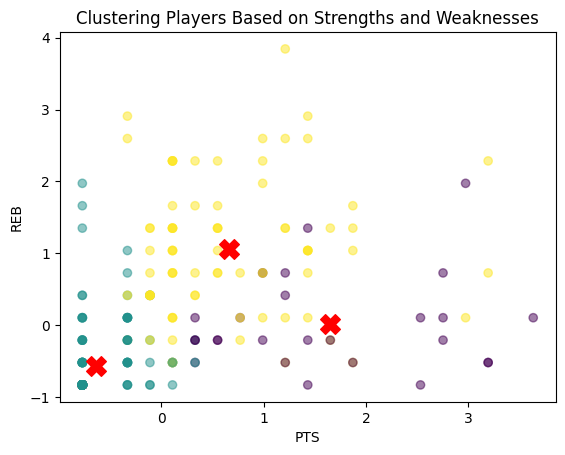

In [68]:
n_clusters = 3

# kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# infomation
cluster_stats = df.groupby('cluster')[selected_features].mean()
print(cluster_stats)

# scatter
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Clustering Players Based on Strengths and Weaknesses')
plt.show()